# k-means Clustering

## Libraries and settings

In [20]:
# Install opencv-python-headless (neccessary in GitHub Codespaces)
!pip install --upgrade pip
!pip install opencv-python-headless

# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('\nCurrent working directory:', os.getcwd())

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

Current working directory: /workspaces/data_analytics/Week_10


## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

### Import the apartment data

In [21]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


### Subset of the apartment data frame for k-means clustering

In [22]:
# Define a subset of the data frame for k-means clustering
X3 = df[['rooms',
         'area',
         'lat',
         'lon',
         'price_per_m2']]

### Elbow method showing the optimal k

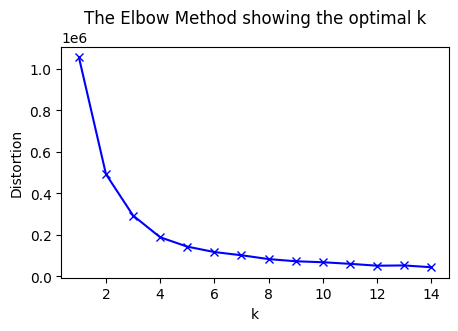

In [23]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Perform k-means clustering on the apartment data

In [24]:
# Number of clusters
k = 5

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.predict(X3)

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)

cluster
1    261
3    252
0    108
2     79
4     22
Name: count, dtype: int64

### Print attribute values of clustering

In [25]:
print('labels: \n', kmeans_apmts.labels_, '\n\n') 
print('inertia (WCSS): \n', kmeans_apmts.inertia_, '\n\n') 
print('cluster centers: \n', kmeans_apmts.cluster_centers_, '\n\n') 
print('feature names: \n', kmeans_apmts.feature_names_in_) 

labels: 
 [1 3 1 0 1 1 1 3 1 4 2 3 4 0 2 2 1 2 1 2 1 3 1 2 1 1 3 2 3 2 1 0 1 1 3 2 3
 1 2 1 2 3 1 3 3 1 2 1 1 0 3 2 1 3 1 2 3 3 2 3 2 2 3 1 1 3 1 2 1 3 2 2 2 0
 3 2 2 2 0 1 3 3 2 1 3 3 2 2 3 0 1 1 2 2 2 1 3 3 3 1 2 2 0 1 3 3 3 1 1 1 1
 1 1 3 3 3 0 2 3 3 0 1 1 2 1 1 1 2 2 2 1 2 2 3 3 2 3 3 1 3 3 1 3 1 1 2 2 1
 1 2 1 3 3 2 3 3 1 2 3 2 1 1 2 2 3 2 1 2 1 1 3 2 3 1 2 1 0 1 2 1 1 1 3 3 1
 3 1 3 0 1 1 1 1 2 2 1 0 2 2 2 2 2 0 3 1 2 1 1 3 1 3 1 3 2 0 1 0 1 1 1 1 3
 1 1 1 1 1 1 1 1 3 3 2 1 0 3 1 3 3 3 0 0 1 1 1 3 0 3 0 4 1 0 1 3 0 3 3 3 1
 3 3 1 0 3 1 1 0 0 1 0 0 2 3 3 3 4 1 0 3 3 0 3 1 1 1 3 1 3 3 3 3 0 0 1 1 1
 3 1 1 1 3 3 0 1 1 3 0 3 2 3 1 1 1 3 3 0 0 1 1 1 4 3 1 3 3 1 3 1 3 3 2 3 1
 1 1 3 1 3 1 3 1 3 4 3 3 1 1 4 3 1 2 4 3 3 0 1 3 3 0 3 3 1 3 3 1 1 3 0 1 4
 1 1 1 3 1 1 1 1 1 2 1 0 1 1 2 1 1 3 3 3 1 3 1 1 3 2 2 1 0 1 0 1 3 1 3 0 1
 2 1 1 3 3 0 4 0 0 3 3 3 1 2 3 3 3 3 1 1 0 3 1 1 1 3 1 0 1 0 3 3 3 3 3 1 1
 1 1 3 0 0 1 3 0 3 1 0 1 0 2 2 1 1 3 0 3 0 0 0 1 0 3 1 3 1 3 3 0 1 1 3 1 1
 1 3 3 1 3 1 3 

### Plot the apartment clusters

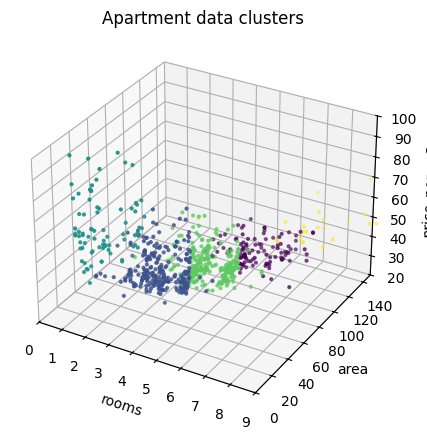

In [26]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()

### Calculate the Silhouette Score

k=4, Silhouette Score: 0.4706


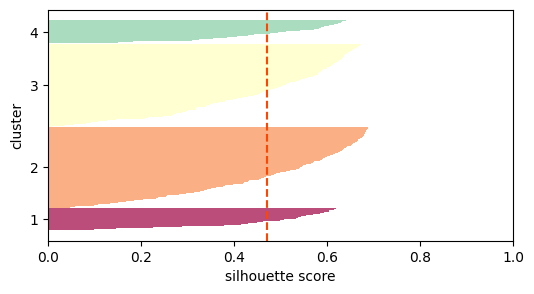

k=5, Silhouette Score: 0.4116


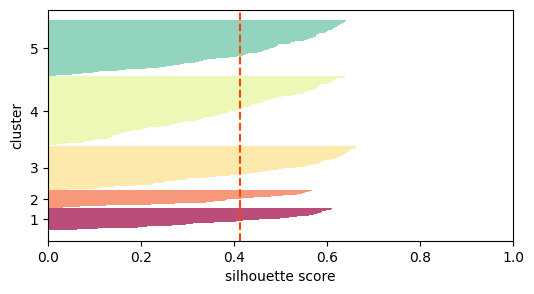

k=6, Silhouette Score: 0.4165


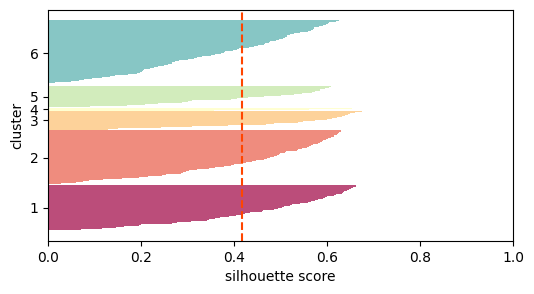

k=7, Silhouette Score: 0.3934


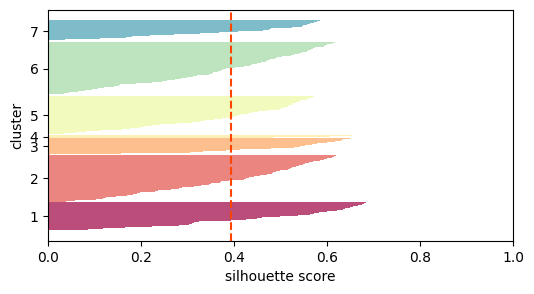

In [27]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in range(4,8,1):
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X3)
    print(f'k={i}, Silhouette Score: {silhouette_score(X3, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X3, fitted_model=model)

In [28]:
print(f'Silhouette Score: {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.4547


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [29]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-22 12:46:05
Python Version: 3.11.10
-----------------------------------
